<a href="https://colab.research.google.com/github/supremepoulet/github_actions/blob/main/1_Gender_detection_corrig%C3%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="https://assets-datascientest.s3-eu-west-1.amazonaws.com/train/logo_datascientest.png" style="height:150px;center"></center>

<hr style="border-width:2px;border-color:#75DFC1">
<center><h1>Deep-Learning - Modules complémentaires</h1></center>
<center><h2>Classification sur des données structurées</h2></center>
<hr style="border-width:2px;border-color:#75DFC1">


Le but de cet exercice est de s'entraîner à faire une classification sur des données structurées à l'aide d'un réseau de neurones dense.

 Nous allons travailler avec la base de données **```gender_classification.csv```**, qui contient les caractéristiques physiques du visage d'hommes et de femmes ainsi que leur genre.

> La structure de l'exercice est la suivante :
>> I - [Préparation du dataset](#preparation)
>>
>>
>> II - [Classification avec un algorithme classique (KNN)](#knn)
>>
>>
>> III - [Classification à l'aide d'un réseau de neurones dense](#dnn)

- Exécuter les cellules ci-dessous pour importer le dataset et les modules nécessaires à l'exercice.

In [ ]:
!wget https://assets-datascientest.s3-eu-west-1.amazonaws.com/datasets/gender_classification.zip
!unzip gender_classification.zip

--2021-08-03 11:59:31--  https://assets-datascientest.s3-eu-west-1.amazonaws.com/datasets/gender_classification.zip
Resolving assets-datascientest.s3-eu-west-1.amazonaws.com (assets-datascientest.s3-eu-west-1.amazonaws.com)... 52.218.109.248
Connecting to assets-datascientest.s3-eu-west-1.amazonaws.com (assets-datascientest.s3-eu-west-1.amazonaws.com)|52.218.109.248|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19483 (19K) [application/zip]
Saving to: ‘gender_classification.zip’

gender_classificati 100%[===================>]  19.03K  73.7KB/s    in 0.3s    

2021-08-03 11:59:33 (73.7 KB/s) - ‘gender_classification.zip’ saved [19483/19483]

Archive:  gender_classification.zip
  inflating: gender_classification.csv  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.neighbors import KNeighborsClassifier

from tensorflow.keras import callbacks
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

# <a name="preparation"></a> I - Préparation du dataset

- (a) Charger le jeu de données **```gender_classification.csv```** dans un DataFrame ```df```.

- (b) Afficher la shape de ```df``` ainsi que ses 5 premières lignes.

In [ ]:
df = pd.read_csv('gender_classification.csv')

In [ ]:
print("Nombre de lignes dans le dataset : {}".format(df.shape[0]))
print("Nombre de colonnes dans le dataset : {}".format(df.shape[1]))

df.head()

Nombre de lignes dans le dataset : 5001
Nombre de colonnes dans le dataset : 8


,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


- (c) Vérifier que les colonnes de ```df``` sont du bon type, et traiter les valeurs manquantes s'il y en a.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [ ]:
df.isna().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

- (d) Préparer les données.
> Cette partie regroupe :
>> - L'encodage des variables
>>
>>
>> - la séparation des variables explicatives de la variable cible
>>
>>
>> - La création d'un jeu de test et d'entraînement
>>
>>
>> - Le scaling de ```X_train``` et ```X_test```

In [ ]:
X = df.drop(labels='gender', axis=1)
y = df['gender'].replace({'Male' : 0, 'Female' : 1})

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
scaler = MinMaxScaler()

scaler.fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

# II - <a name="knn"></a> Classification avec un algorithme classique (KNN)

- (a) Instancier un modèle de classification KNN.

- (b) Fit le modèle aux données d'entraînement.

- (c) Effectuer une prédiction à partir des données de test (attention au scaling).

- (d) Afficher la matrice de confusion de la prédiction.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [ ]:
y_pred_knn = knn.predict(X_test_scaled)

In [ ]:
pd.crosstab(y_test, y_pred_knn, rownames = ['Classe réelle'], colnames = ['Classe prédite par knn'])

Classe prédite par knn,0,1
Classe réelle,,
0,505,9
1,29,458


# III - <a name="dnn"></a> Classification à l'aide d'un réseau de neurones dense

- (a) Instancier un réseau de neurones dense de l'architecture de votre choix.

- (b) Compiler le modèle avec une métrique appropriée.

- (c) Entraîner le modèle avec les paramètres de votre choix. On pourra également définir des callbacks.

- (d) Effectuer une prédiction à partir des données de test (attention au scaling).

- (e) Afficher la matrice de confusion de la prédiction

In [ ]:
input_shape = (X_train_scaled.shape[1],)

In [ ]:
model = Sequential()
model.add(Dense(units=10, input_shape=input_shape, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=2048, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

In [ ]:
early_stopping = callbacks.EarlyStopping(monitor = 'val_loss',
                        patience = 20,
                        mode = 'min',
                        restore_best_weights = True)

lr_plateau = callbacks.ReduceLROnPlateau(monitor = 'val_loss',
                            patience=5,
                            factor=0.8,
                            verbose=2,
                            mode='min')

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs = 200, batch_size = 30, validation_split = 0.2, callbacks = [early_stopping,lr_plateau])

Epoch 1/200
107/107 [==============================] - 3s 15ms/step - loss: 0.1810 - accuracy: 0.9322 - val_loss: 0.1106 - val_accuracy: 0.9475
Epoch 2/200
107/107 [==============================] - 1s 14ms/step - loss: 0.1065 - accuracy: 0.9572 - val_loss: 0.1125 - val_accuracy: 0.9538
Epoch 3/200
107/107 [==============================] - 1s 13ms/step - loss: 0.0980 - accuracy: 0.9619 - val_loss: 0.0816 - val_accuracy: 0.9613
Epoch 4/200
107/107 [==============================] - 1s 13ms/step - loss: 0.0860 - accuracy: 0.9650 - val_loss: 0.0786 - val_accuracy: 0.9663
Epoch 5/200
107/107 [==============================] - 1s 13ms/step - loss: 0.0944 - accuracy: 0.9634 - val_loss: 0.0872 - val_accuracy: 0.9575
Epoch 6/200
107/107 [==============================] - 1s 13ms/step - loss: 0.0815 - accuracy: 0.9663 - val_loss: 0.0853 - val_accuracy: 0.9588
Epoch 7/200
107/107 [==============================] - 1s 13ms/step - loss: 0.0768 - accuracy: 0.9684 - val_loss: 0.0889 - val_accuracy:

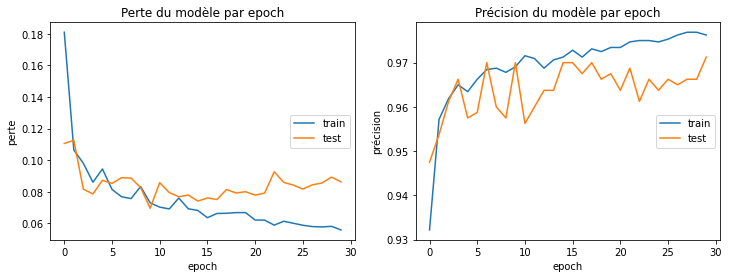

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Perte du modèle par epoch')
plt.ylabel('perte')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')

plt.subplot(122)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Précision du modèle par epoch')
plt.ylabel('précision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right');

In [ ]:
y_prob_dnn = model.predict(X_test_scaled)
y_pred_dnn = y_prob_dnn.argmax(axis=-1)

In [ ]:
pd.crosstab(y_test, y_pred_dnn, rownames = ['Classe réelle'], colnames = ['Classe prédite par dnn'])

Classe prédite par dnn,0,1
Classe réelle,,
0,502,12
1,15,472
